In [389]:
%matplotlib notebook

In [422]:
# Import Dependencies
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
import scipy.stats as st

In [391]:
#read CSV File
zev_sales_csv = pd.read_csv("Resources/ZEV_Sales_CSV.csv").set_index('Data Year')
median_income_county = pd.read_csv('Resources/2020_Median_Income_Per_County.csv')
ev_chargers_csv = pd.read_csv('Resources/EV_Chargers_Last_updated_03-20-2023_ada (1).csv')

In [392]:
# 2020- 2023 sales
recent_zev_sales = pd.DataFrame(zev_sales_csv.loc[[2019,2020,2021,2022,2023],:])
recent_zev_sales.head()

,County,FUEL_TYPE,MAKE,MODEL,Number of Vehicles
Data Year,,,,,
2019,Alameda,Electric,Audi,e-tron,74
2019,Alameda,Electric,BMW,i3,112
2019,Alameda,Electric,Chevrolet,Bolt EV,1047
2019,Alameda,Electric,FIAT,500e,31
2019,Alameda,Electric,Ford,Focus,2


In [393]:
zev_sales_csv_county = pd.DataFrame(recent_zev_sales.groupby("County")["Number of Vehicles"].sum().sort_values(ascending=False))
print(zev_sales_csv_county.head(13))
print(zev_sales_csv_county.tail(15))

                Number of Vehicles
County                            
Los Angeles                 276524
Orange                      128893
Santa Clara                  99703
San Diego                    85388
Alameda                      65017
Riverside                    41204
San Mateo                    40646
Contra Costa                 37788
San Bernardino               32175
San Francisco                26252
Sacramento                   24929
Ventura                      21122
Marin                        13437
           Number of Vehicles
County                       
Amador                    263
Tehama                    228
Siskiyou                  141
Mono                      129
Inyo                      125
Mariposa                  108
Glenn                      99
Plumas                     84
Del Norte                  62
Colusa                     60
Trinity                    38
Lassen                     33
Alpine                     29
Sierra                   

In [394]:
zev_sales_csv_large = pd.DataFrame(zev_sales_csv_county[zev_sales_csv_county['Number of Vehicles']> 20000]).dropna(how='all')
zev_sales_csv_large

,Number of Vehicles
County,
Los Angeles,276524
Orange,128893
Santa Clara,99703
San Diego,85388
Alameda,65017
Riverside,41204
San Mateo,40646
Contra Costa,37788
San Bernardino,32175


In [395]:
zev_sales_csv_small = zev_sales_csv_county[zev_sales_csv_county['Number of Vehicles']< 20000].dropna(how='all')
Other = zev_sales_csv_small.sum()
Other

Number of Vehicles    132955
dtype: int64

In [396]:
Other_df = pd.DataFrame({'Number of Vehicles':132955},index=['Other'])
Other_df.index.rename('County', inplace=True)
Other_df

,Number of Vehicles
County,
Other,132955


In [397]:
zev_sales_chart_data = pd.concat([zev_sales_csv_large,Other_df])
zev_sales_chart_data

,Number of Vehicles
County,
Los Angeles,276524
Orange,128893
Santa Clara,99703
San Diego,85388
Alameda,65017
Riverside,41204
San Mateo,40646
Contra Costa,37788
San Bernardino,32175


In [398]:
zev_sales_csv_county = pd.DataFrame(recent_zev_sales.groupby(["County","FUEL_TYPE"])["Number of Vehicles"].sum().sort_values(ascending=False).reset_index().set_index("County"))
print(zev_sales_csv_county.head(20))
print(zev_sales_csv_county.tail(5))

               FUEL_TYPE  Number of Vehicles
County                                      
Los Angeles     Electric              203836
Orange          Electric               97997
Santa Clara     Electric               80092
Los Angeles         PHEV               69333
San Diego       Electric               66321
Alameda         Electric               51615
San Mateo       Electric               33862
Riverside       Electric               30900
Contra Costa    Electric               29489
Orange              PHEV               28755
San Bernardino  Electric               23753
San Francisco   Electric               20278
Sacramento      Electric               19105
San Diego           PHEV               18645
Santa Clara         PHEV               18381
Ventura         Electric               16333
Alameda             PHEV               12803
Marin           Electric               10308
Riverside           PHEV               10057
San Joaquin     Electric                9789
         F

<IPython.core.display.Javascript object>


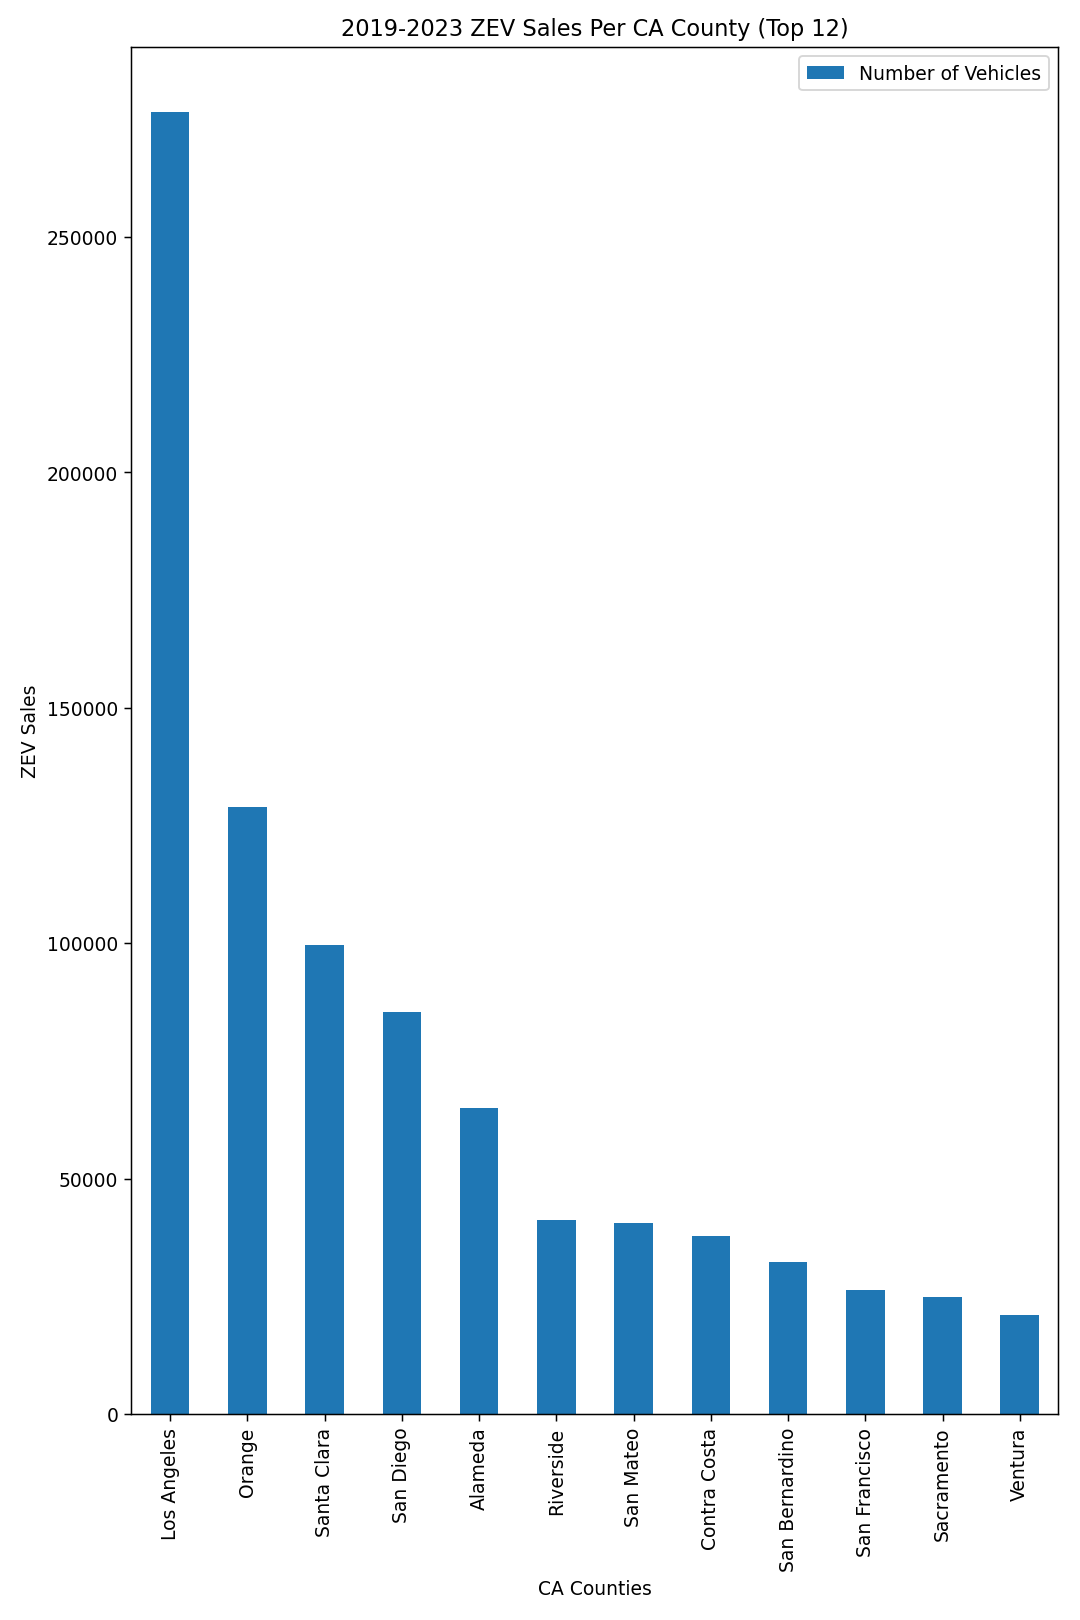

In [399]:
# Create a bar chart based off 2019-2023 Sales
zev_sales_csv_large.plot(kind="bar",figsize=(8,12),)

# Set the xlabel and ylabel 
plt.xlabel("CA Counties")
plt.ylabel("ZEV Sales")
plt.title("2019-2023 ZEV Sales Per CA County (Top 12)")

#Show Graph
plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


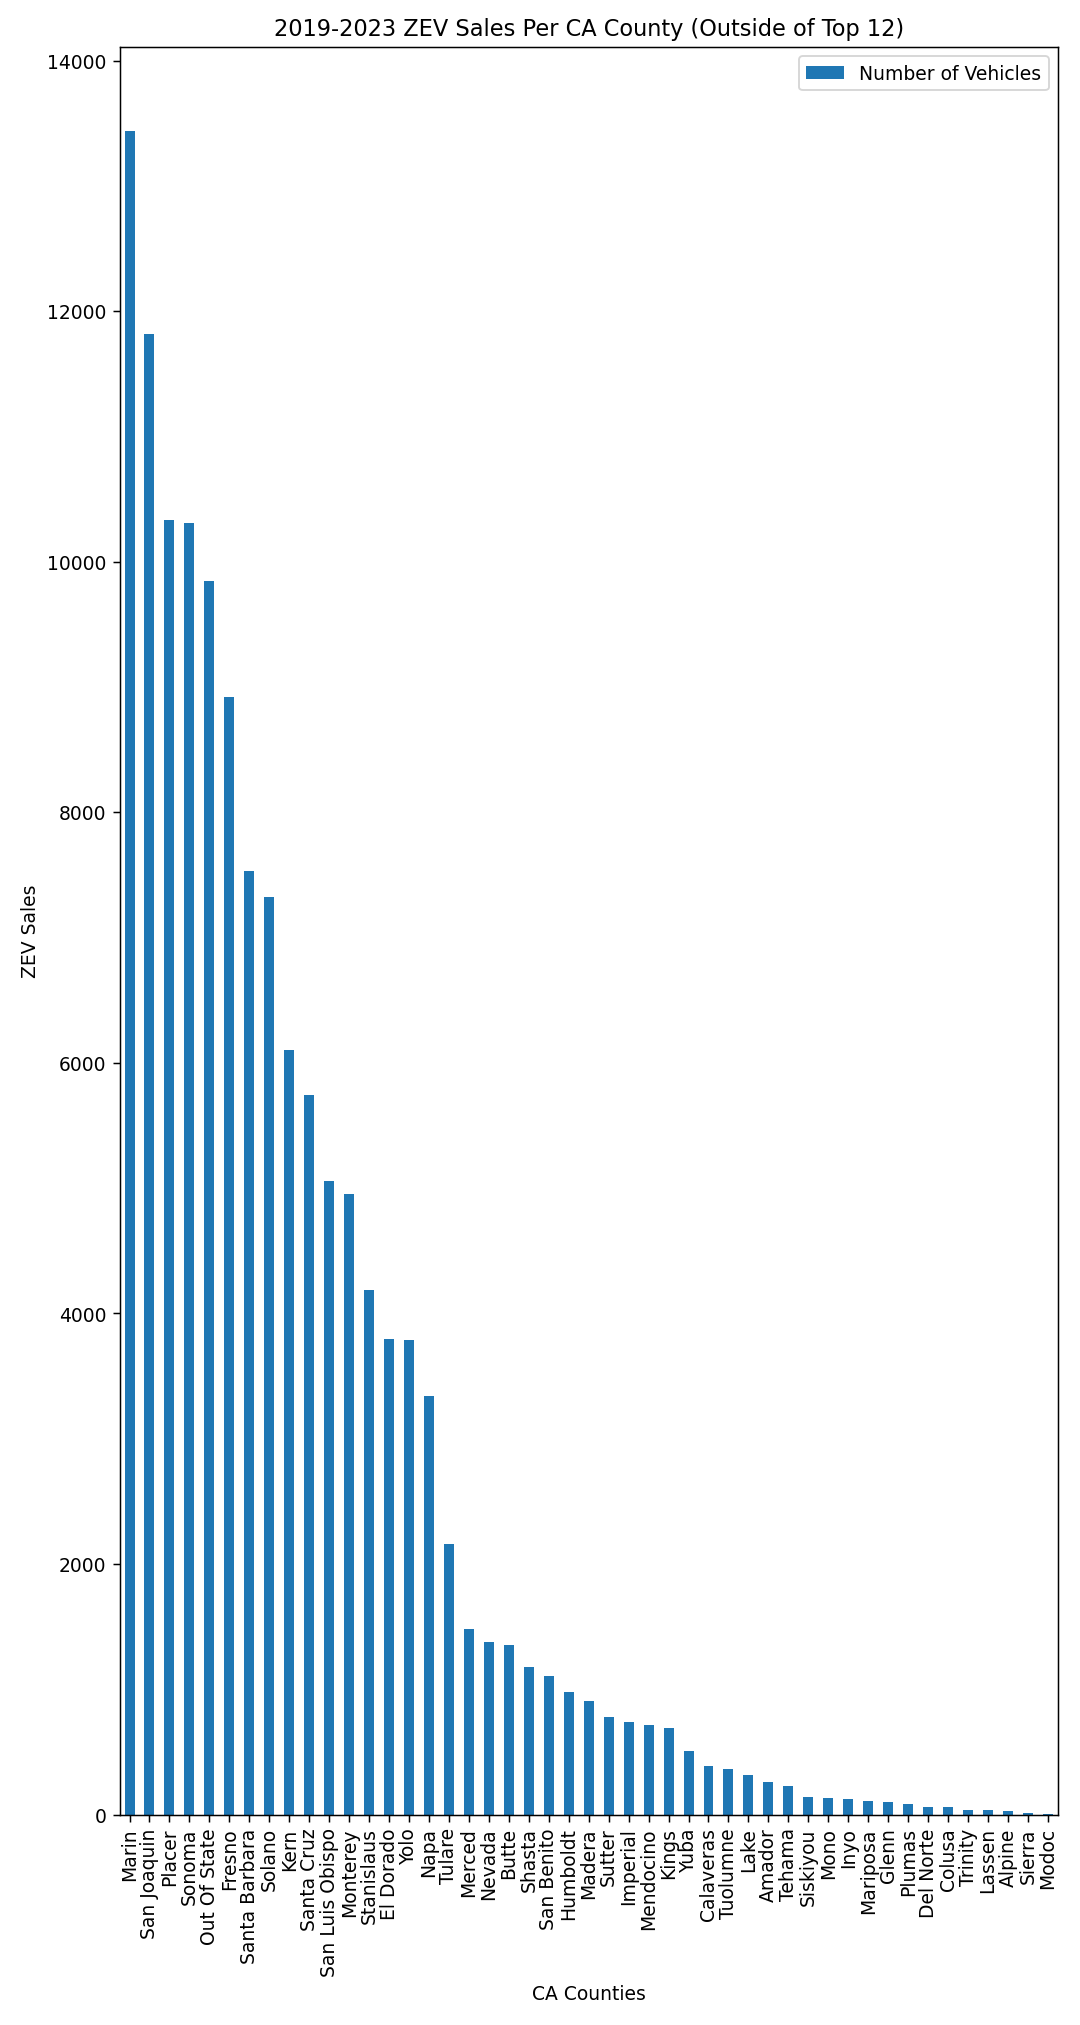

In [400]:
# Create a bar chart based off 2019-2023 Sales
zev_sales_csv_small.plot(kind="bar",figsize=(8,15))

# Set the xlabel and ylabel 
plt.xlabel("CA Counties")
plt.ylabel("ZEV Sales")
plt.title("2019-2023 ZEV Sales Per CA County (Outside of Top 12)")

#Show Graph
plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


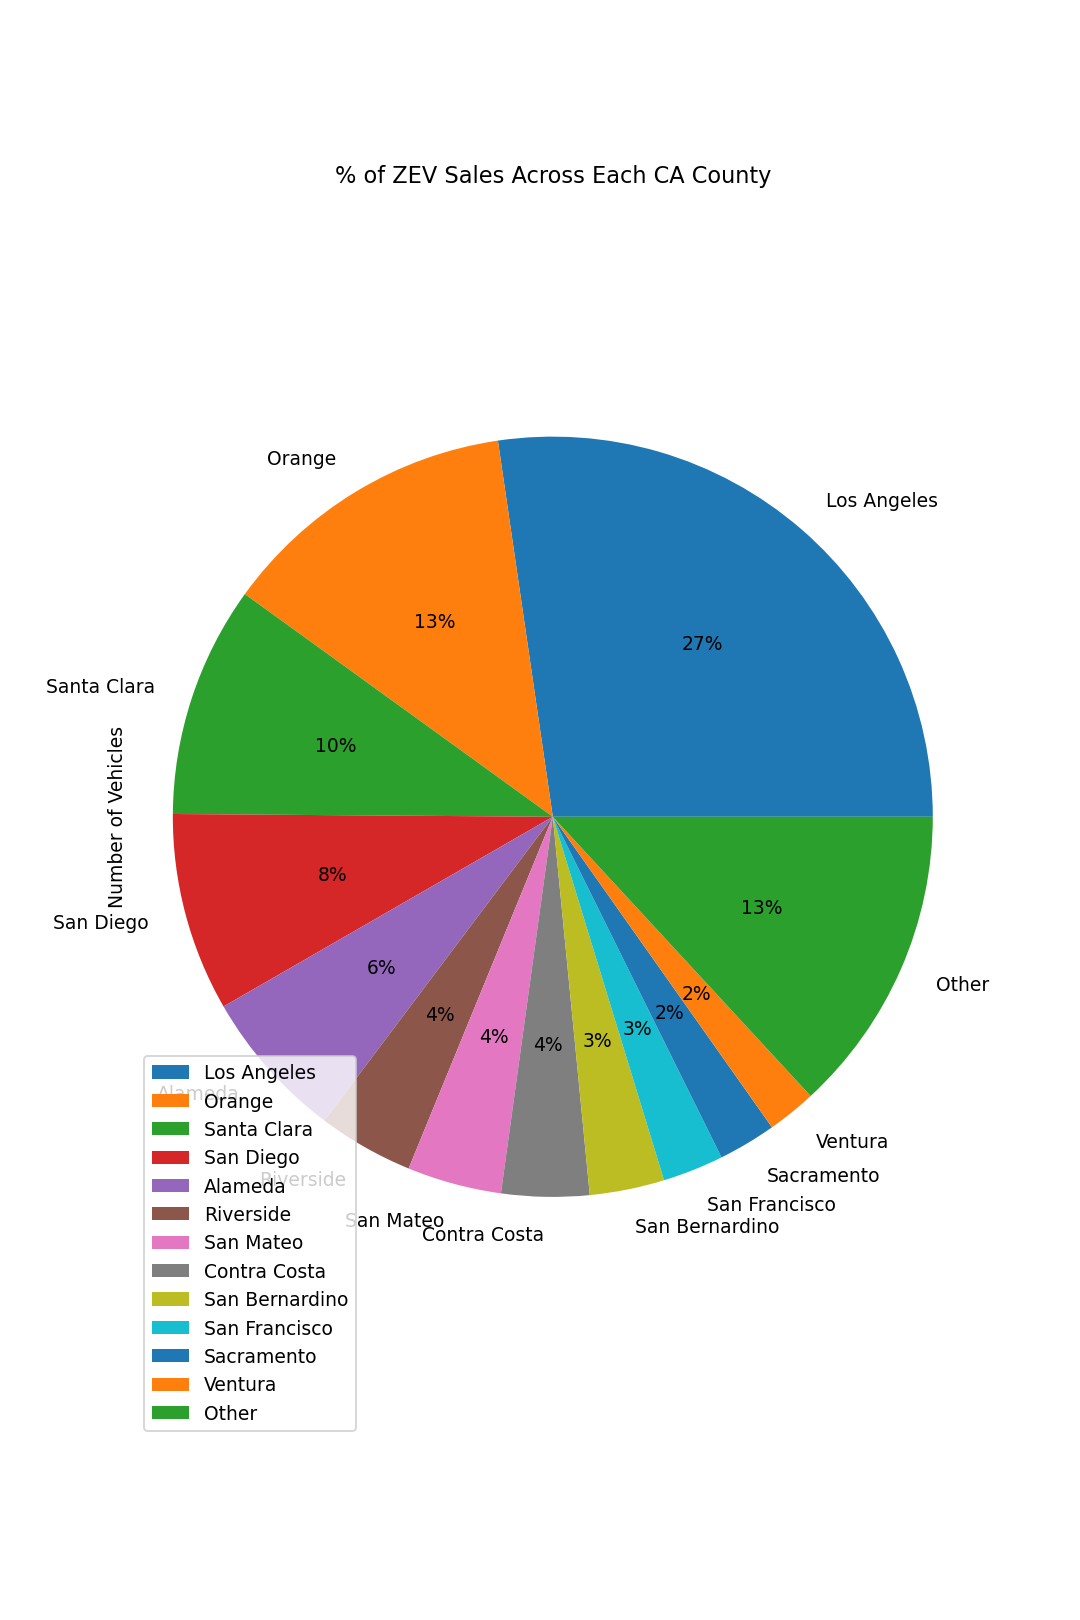

<Axes: title={'center': '% of ZEV Sales Across Each CA County'}, ylabel='Number of Vehicles'>

In [401]:
# Create a bar chart based off 2019-2023 Sales
plot = zev_sales_chart_data.plot.pie(y="Number of Vehicles",figsize=(8,12), autopct='%1.0f%%',
                                     title = '% of ZEV Sales Across Each CA County',legend='best')
plt.legend(loc='lower left')
plt.axis("equal")
plot

In [402]:
median_income_county = median_income_county.dropna(how='any').rename(columns={'Unnamed: 1':"County",'Unnamed: 2':"Median Income"}).sort_values("Median Income",ascending=False)
print(median_income_county.head(5))
print(median_income_county.tail(5))

   TABLE B-6.1           County Median Income
8            1      Santa Clara       $69,431
9            2            Marin       $67,925
10           3        San Mateo       $67,870
11           4    San Francisco       $66,004
12           5          Alameda       $59,976
   TABLE B-6.1      County Median Income
61          54      Madera       $31,609
62          55        Kern       $31,594
63          56      Alpine       $31,360
64          57      Tulare       $30,151
65          58    Imperial       $25,451


In [403]:
fav_make_model =  pd.DataFrame(recent_zev_sales.groupby(["MAKE","MODEL","FUEL_TYPE"])["Number of Vehicles"].sum().sort_values(ascending=False).reset_index().head(20))
fav_make_model[['MAKE','MODEL']]

,MAKE,MODEL
0,Tesla,Model 3
1,Tesla,Model Y
2,Toyota,Prius Prime
3,Chevrolet,Bolt EV
4,Tesla,Model X
5,Tesla,Model S
6,Ford,Mustang Mach-E
7,BMW,5 Series
8,Toyota,RAV4 Prime
9,Honda,Clarity PHEV


<IPython.core.display.Javascript object>


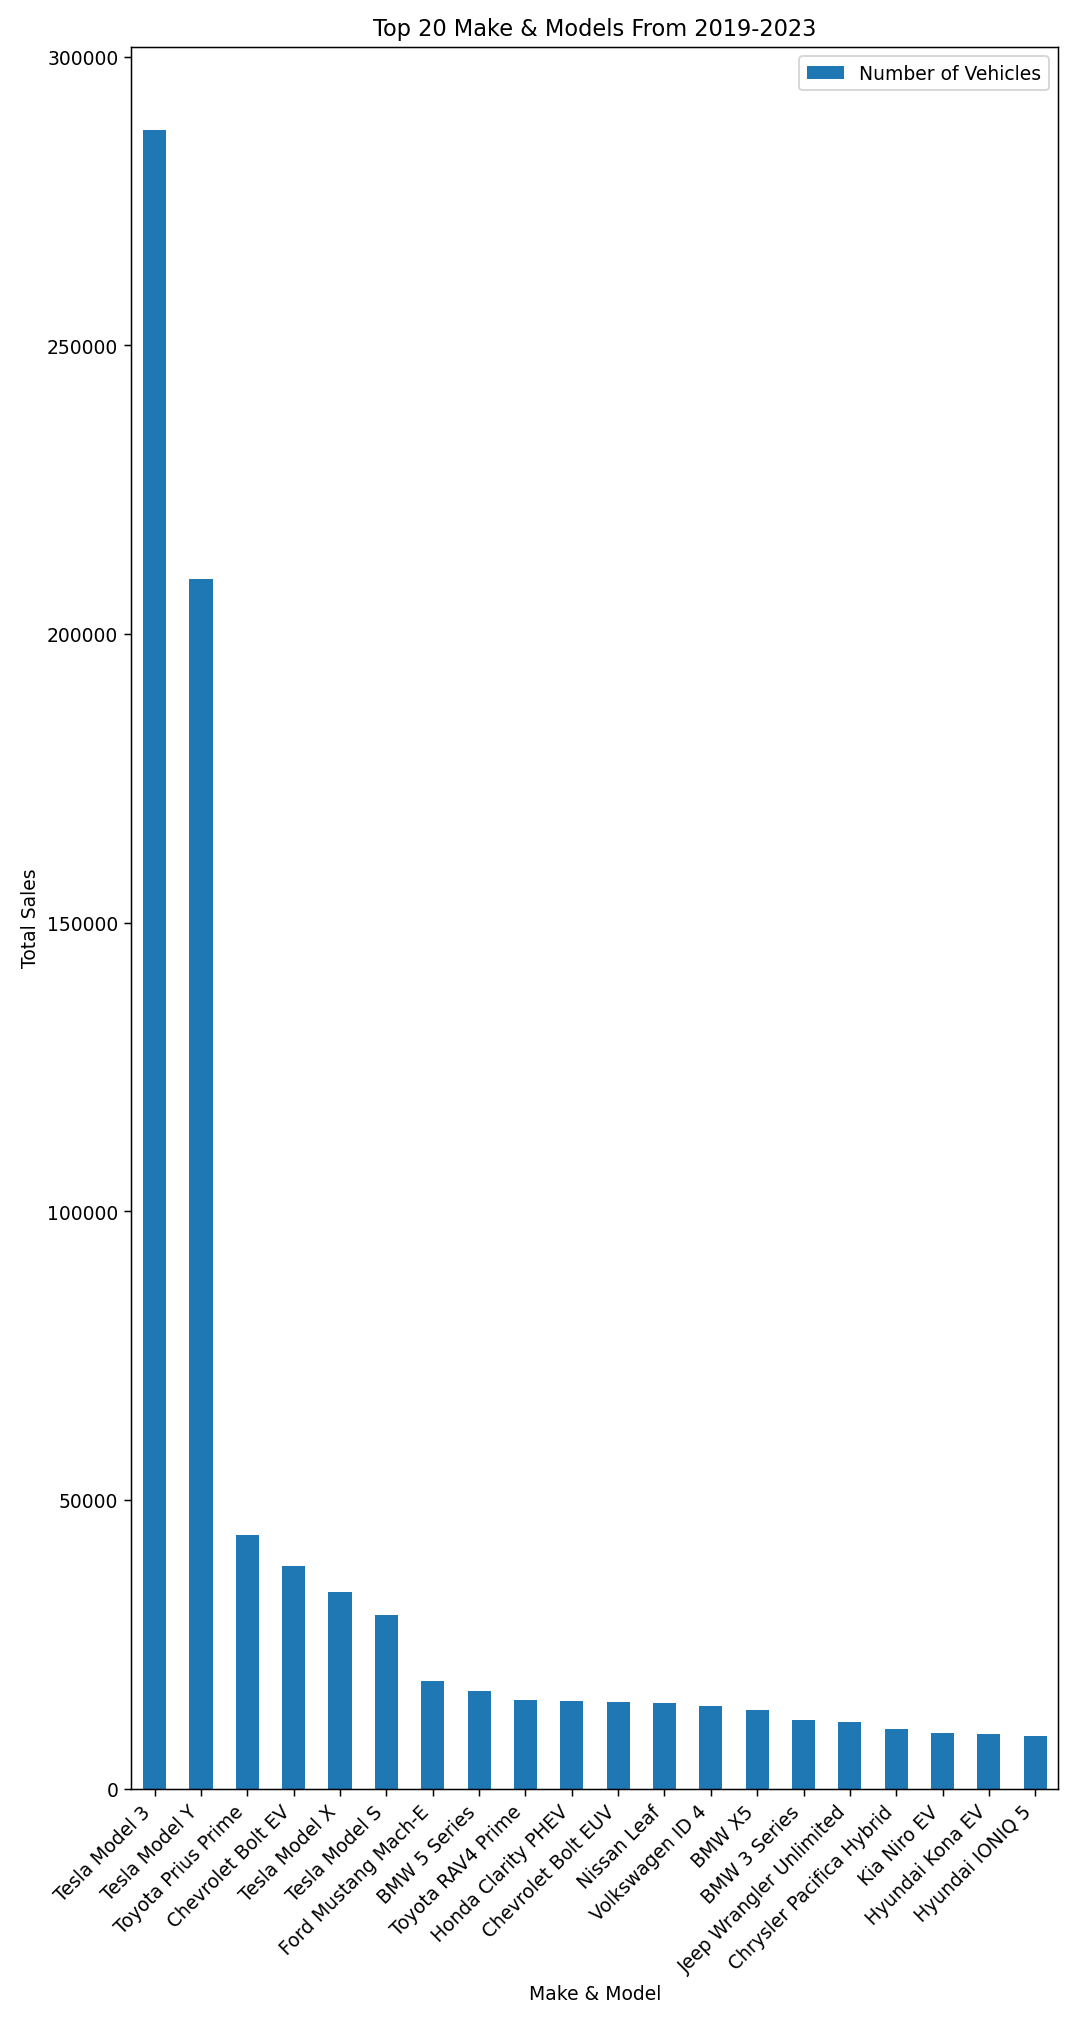

In [404]:
x_axis = np.arange(len(fav_make_model))
tick_locations = [value for value in x_axis]
# Create a bar chart 
fav_make_model.plot(kind="bar",figsize=(8,15))

# Set the xlabel and ylabel 
plt.xlabel("Make & Model")
plt.ylabel("Total Sales")
plt.title("Top 20 Make & Models From 2019-2023")
plt.xticks(tick_locations, ['Tesla Model 3','Tesla Model Y','Toyota Prius Prime','Chevrolet Bolt EV','Tesla Model X',
                            'Tesla Model S','Ford Mustang Mach-E','BMW 5 Series','Toyota RAV4 Prime','Honda Clarity PHEV',
                            'Chevrolet Bolt EUV','Nissan Leaf','Volkswagen ID 4','BMW X5','BMW 3 Series','Jeep Wrangler Unlimited',
                            'Chrysler Pacifica Hybrid','Kia Niro EV','Hyundai Kona EV','Hyundai IONIQ 5'],
                             rotation=45, ha="right")

#Show Graph
plt.show()
plt.tight_layout()

In [405]:
fav_model_per_county = pd.DataFrame(recent_zev_sales.groupby(['County',"MAKE","MODEL","FUEL_TYPE"])["Number of Vehicles"].sum().sort_values(ascending=False).reset_index())
print(fav_model_per_county.head(10))
print(fav_model_per_county.tail(5))

        County   MAKE    MODEL FUEL_TYPE  Number of Vehicles
0  Los Angeles  Tesla  Model 3  Electric               78629
1  Los Angeles  Tesla  Model Y  Electric               53644
2       Orange  Tesla  Model 3  Electric               35140
3  Santa Clara  Tesla  Model 3  Electric               30353
4       Orange  Tesla  Model Y  Electric               29122
5    San Diego  Tesla  Model 3  Electric               24362
6  Santa Clara  Tesla  Model Y  Electric               22081
7      Alameda  Tesla  Model 3  Electric               18156
8    San Diego  Tesla  Model Y  Electric               16926
9      Alameda  Tesla  Model Y  Electric               14752
            County      MAKE                MODEL FUEL_TYPE  \
4351  Out Of State  Cadillac             CT6 PHEV      PHEV   
4352  Out Of State       BMW                   i7  Electric   
4353  Out Of State      Audi   e-tron S Sportback  Electric   
4354  Out Of State      Audi  Q4 e-tron Sportback  Electric   
4355          

In [406]:
top_model_la=pd.DataFrame(fav_model_per_county.loc[(fav_model_per_county['County']=='Los Angeles'),:].head(3))
top_model_orange=pd.DataFrame(fav_model_per_county.loc[(fav_model_per_county['County']=='Orange'),:].head(3))
top_model_santa_clara=pd.DataFrame(fav_model_per_county.loc[(fav_model_per_county['County']=='Santa Clara'),:].head(3))
top_model_san_diego=pd.DataFrame(fav_model_per_county.loc[(fav_model_per_county['County']=='San Diego'),:].head(3))
top_model_alameda=pd.DataFrame(fav_model_per_county.loc[(fav_model_per_county['County']=='Alameda'),:].head(3))
top_model_riverside=pd.DataFrame(fav_model_per_county.loc[(fav_model_per_county['County']=='Riverside'),:].head(3))
top_model_contra_costa=pd.DataFrame(fav_model_per_county.loc[(fav_model_per_county['County']=='Contra Costa'),:].head(3))
top_model_san_mateo=pd.DataFrame(fav_model_per_county.loc[(fav_model_per_county['County']=='San Mateo'),:].head(3))
top_model_san_bernardino=pd.DataFrame(fav_model_per_county.loc[(fav_model_per_county['County']=='San Bernardino'),:].head(3))
top_model_san_francisco=pd.DataFrame(fav_model_per_county.loc[(fav_model_per_county['County']=='San Francisco'),:].head(3))
top_model_sacramento=pd.DataFrame(fav_model_per_county.loc[(fav_model_per_county['County']=='Sacramento'),:].head(3))
top_model_ventura=pd.DataFrame(fav_model_per_county.loc[(fav_model_per_county['County']=='Ventura'),:].head(3))

In [407]:
fav_make_model_county = pd.concat([top_model_la,top_model_orange,top_model_santa_clara,top_model_san_diego,top_model_alameda,
                                  top_model_riverside,top_model_contra_costa,top_model_san_mateo,top_model_san_bernardino,
                                  top_model_san_francisco,top_model_sacramento,top_model_ventura])
fav_make_model_county

,County,MAKE,MODEL,FUEL_TYPE,Number of Vehicles
0,Los Angeles,Tesla,Model 3,Electric,78629
1,Los Angeles,Tesla,Model Y,Electric,53644
11,Los Angeles,Toyota,Prius Prime,PHEV,12413
2,Orange,Tesla,Model 3,Electric,35140
4,Orange,Tesla,Model Y,Electric,29122
29,Orange,Tesla,Model X,Electric,5548
3,Santa Clara,Tesla,Model 3,Electric,30353
6,Santa Clara,Tesla,Model Y,Electric,22081
27,Santa Clara,Chevrolet,Bolt EV,Electric,5714
5,San Diego,Tesla,Model 3,Electric,24362


<IPython.core.display.Javascript object>


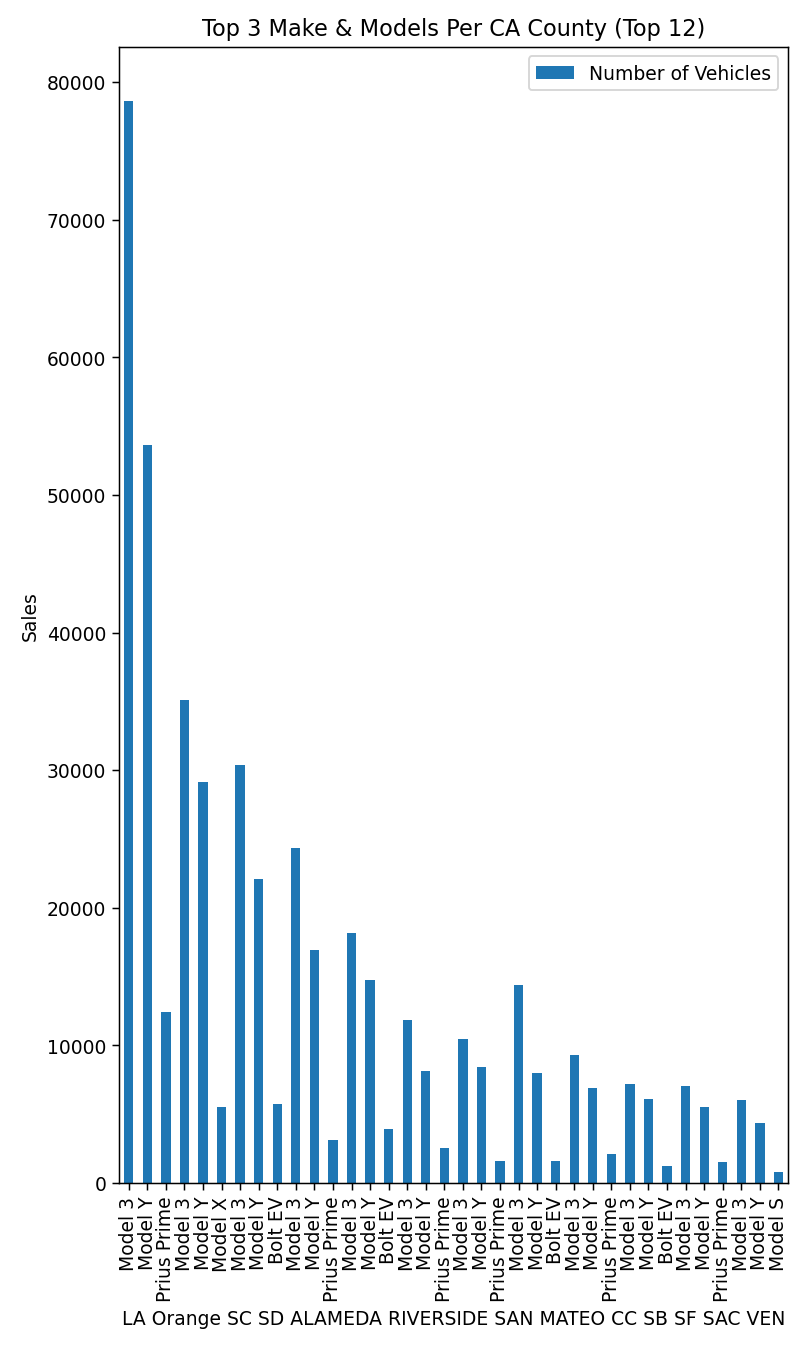

In [408]:

# Create a bar chart 
fav_make_model_county.plot(kind="bar",figsize=(6,10),x='MODEL')
plt.xlabel('LA Orange SC SD ALAMEDA RIVERSIDE SAN MATEO CC SB SF SAC VEN')
plt.ylabel('Sales')
plt.title("Top 3 Make & Models Per CA County (Top 12)")


#Show Graph
plt.show()
plt.tight_layout()

In [452]:
top_model_trinity=pd.DataFrame(fav_model_per_county.loc[(fav_model_per_county['County']=='Trinity'),:].head(3))
top_model_lassen=pd.DataFrame(fav_model_per_county.loc[(fav_model_per_county['County']=='Lassen'),:].head(3))
top_model_alpine=pd.DataFrame(fav_model_per_county.loc[(fav_model_per_county['County']=='Alpine'),:].head(3))
top_model_sierra=pd.DataFrame(fav_model_per_county.loc[(fav_model_per_county['County']=='Sierra'),:].head(3))
top_model_modoc=pd.DataFrame(fav_model_per_county.loc[(fav_model_per_county['County']=='Modoc'),:].head(3))


In [453]:
fav_make_model_bottom_county = pd.concat([top_model_trinity,top_model_lassen,top_model_alpine,top_model_sierra,top_model_modoc])
                               
fav_make_model_bottom_county

,County,MAKE,MODEL,FUEL_TYPE,Number of Vehicles
2316,Trinity,Tesla,Model 3,Electric,9
2565,Trinity,Tesla,Model Y,Electric,7
2963,Trinity,Chevrolet,Bolt EV,Electric,4
2669,Lassen,Tesla,Model 3,Electric,6
2671,Lassen,Tesla,Model Y,Electric,6
3202,Lassen,Jeep,Wrangler Unlimited,PHEV,3
2617,Alpine,Tesla,Model Y,Electric,6
2923,Alpine,Tesla,Model 3,Electric,4
3187,Alpine,Toyota,RAV4 Prime,PHEV,3
2975,Sierra,Tesla,Model 3,Electric,4


In [455]:
# Create a bar chart 
fav_make_model_bottom_county.plot(kind="bar",figsize=(6,10),x='MODEL')
plt.xlabel('Trinity,Lassen,Alpine,Sierra Modoc')
plt.ylabel('Sales')
plt.title("Top 3 Make & Models Per CA County (Bottom 5)")


#Show Graph
plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>

In [412]:
ev_chargers_df = pd.DataFrame(ev_chargers_csv).set_index('County').rename(columns={'Total':'Total EV Chargers'})
ev_chargers_df.head()

,Public Level 1,Shared Private Level 1,Public Level 2,Shared Private Level 2,Public DC Fast,Shared Private DC Fast,Total EV Chargers
County,,,,,,,
Alameda,4,66,1473,2465,385,37,4430
Alpine,0,0,6,0,0,0,6
Amador,0,0,26,0,8,0,34
Butte,6,0,59,55,26,0,146
Calaveras,0,2,11,0,12,0,25


In [413]:
zev_sales_2022 = pd.DataFrame(zev_sales_csv.loc[2022,:])
zev_sales_2022_county = pd.DataFrame(zev_sales_2022.groupby("County")["Number of Vehicles"].sum().sort_values(ascending=False))
ev_chargers_2022_total = ev_chargers_df['Total EV Chargers']
merge_sales_chargers = zev_sales_2022_county.merge(ev_chargers_2022_total,on='County')
merge_sales_chargers.head()

,Number of Vehicles,Total EV Chargers
County,,
Los Angeles,96090,27015
Orange,43517,5383
Santa Clara,30262,17621
San Diego,29592,7735
Alameda,19796,4430


In [423]:
# Plot EV Charges versus ZEV Vehicle Sales on a scatterplot
plt.scatter(merge_sales_chargers['Number of Vehicles'],merge_sales_chargers['Total EV Chargers'])
correlation = st.pearsonr(merge_sales_chargers.iloc[:,1],merge_sales_chargers.iloc[:,0])
plt.xlabel("Number of EV Chargers")
plt.ylabel("Number of ZEV Sales")
plt.show()

In [415]:
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.93
